## Load the Data

In [40]:
import os
import sys
import pandas as pd

sys.path.append(os.path.abspath('../scripts'))
data = pd.read_csv(r'../data/MachineLearningRating_v3.txt', sep="|")
data.to_csv(r'../data/MachineLearningRating_v3.csv', index=False)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2828\2447054232.py:6: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'../data/MachineLearningRating_v3.txt', sep="|")


## Type of column in data

In [41]:
data.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [42]:
descriptive_stats = data[['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']].describe()
descriptive_stats

,TotalPremium,TotalClaims,SumInsured,CalculatedPremiumPerTerm
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01,6.041727e+05,1.178757e+02
std,2.302845e+02,2.384075e+03,1.508332e+06,3.997017e+02
min,-7.825768e+02,-1.200241e+04,1.000000e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+03,3.224800e+00
50%,2.178333e+00,0.000000e+00,7.500000e+03,8.436900e+00
75%,2.192982e+01,0.000000e+00,2.500000e+05,9.000000e+01
max,6.528260e+04,3.930921e+05,1.263620e+07,7.442217e+04


In [43]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

## Handling Missing values

In [44]:
from handle_missing_values import handle_missing_values

cleaned_data = handle_missing_values(data)

# Verify if missing values have been handled
print(cleaned_data.isnull().sum())

c:\Users\Administrator\Desktop\KAIM\AlphaCare-Insurance-Solutions\scripts\handle_missing_values.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')  # Convert to datetime


UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

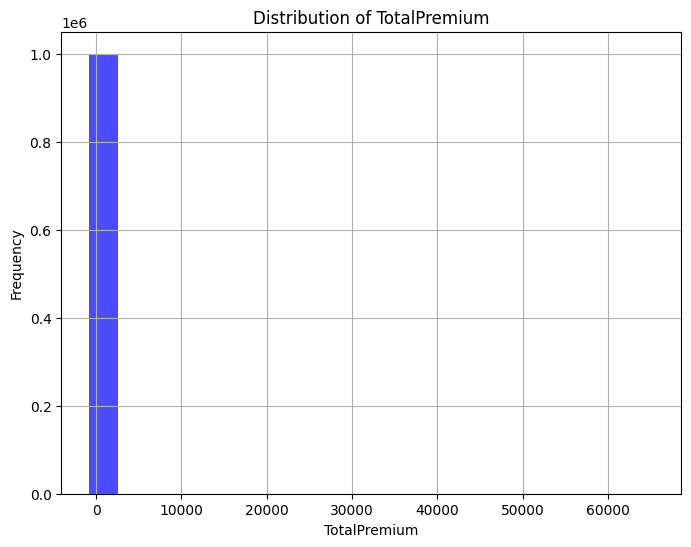

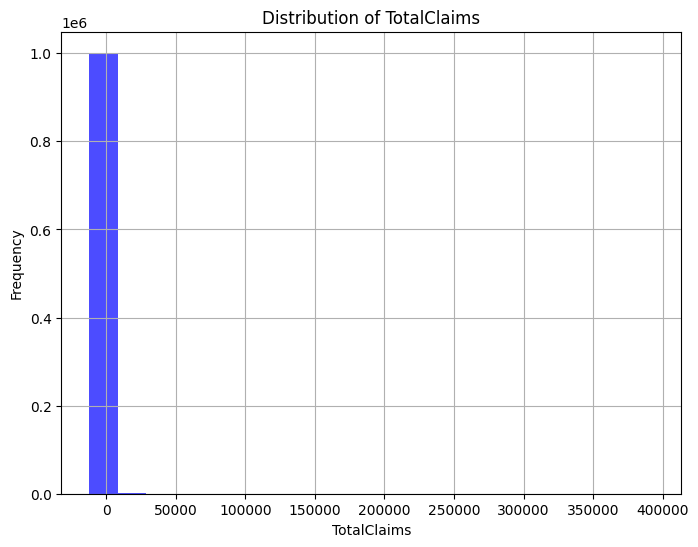

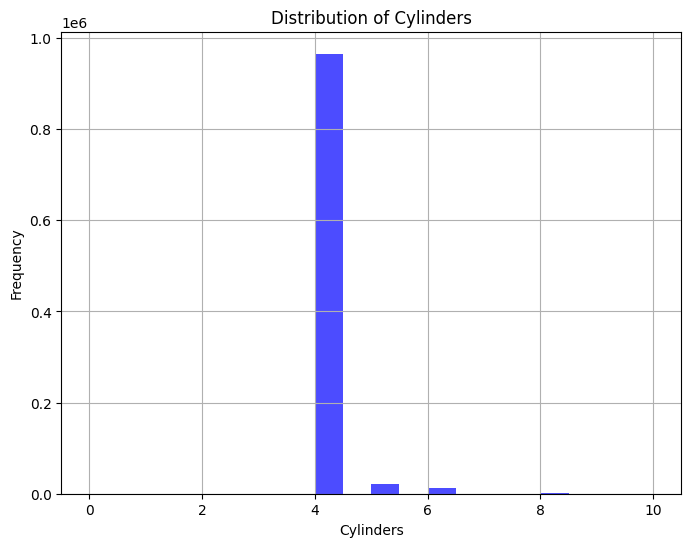

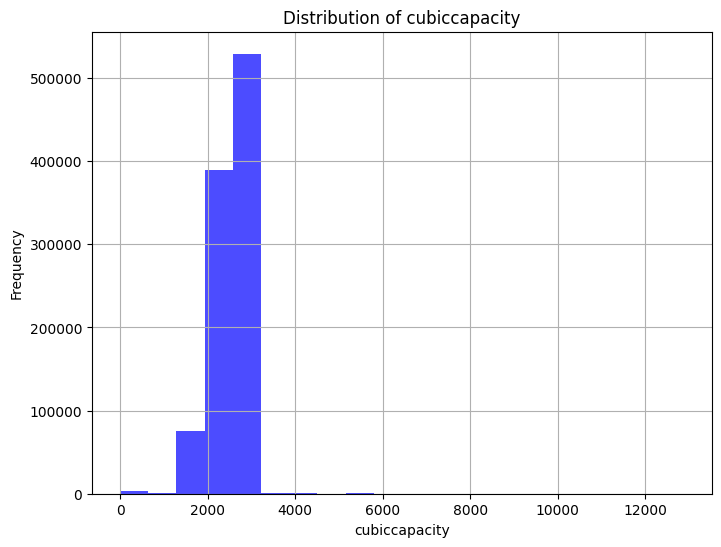

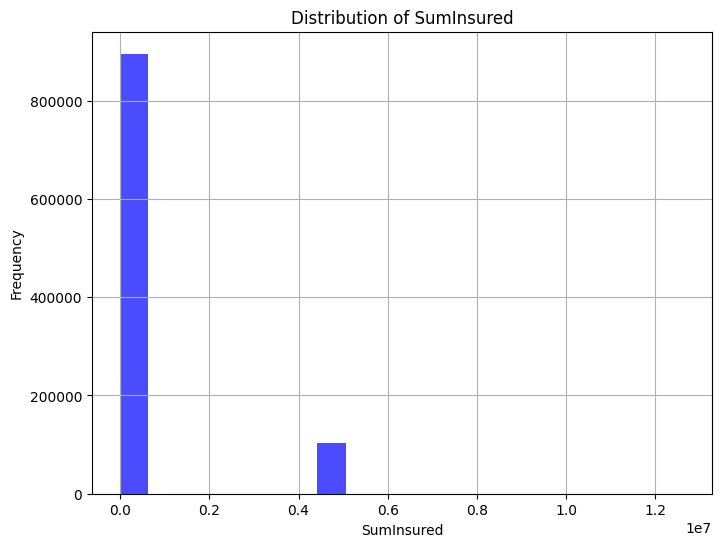

In [45]:
from plot_histogram import plot_histograms

column = ['TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 'SumInsured']

plot_histograms(cleaned_data, column)

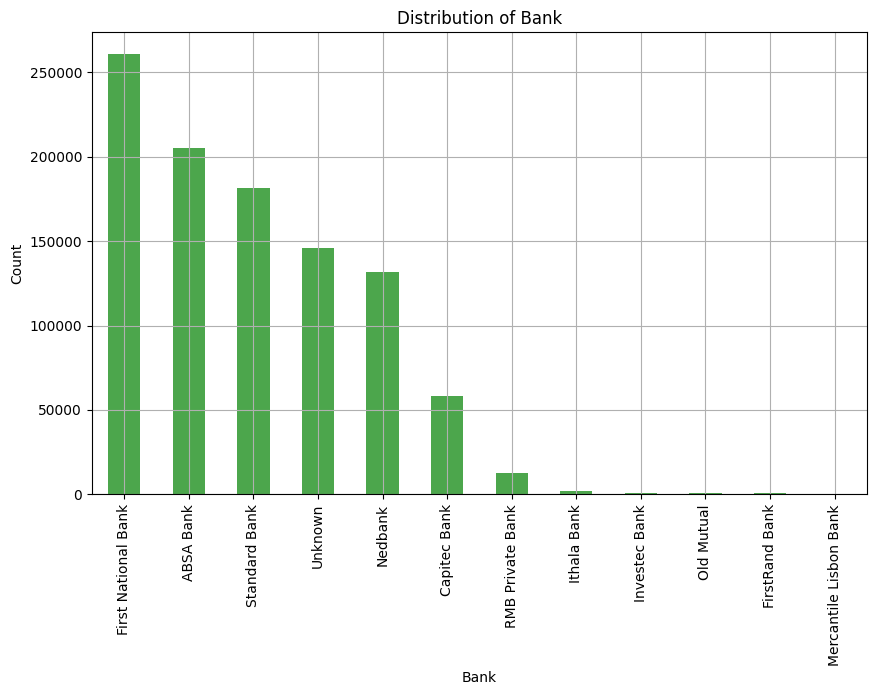

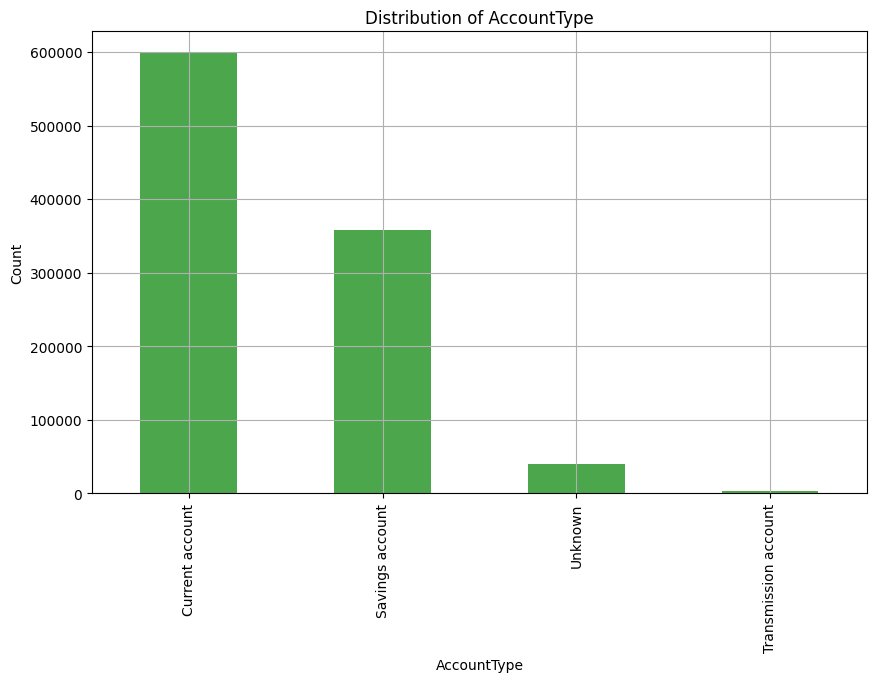

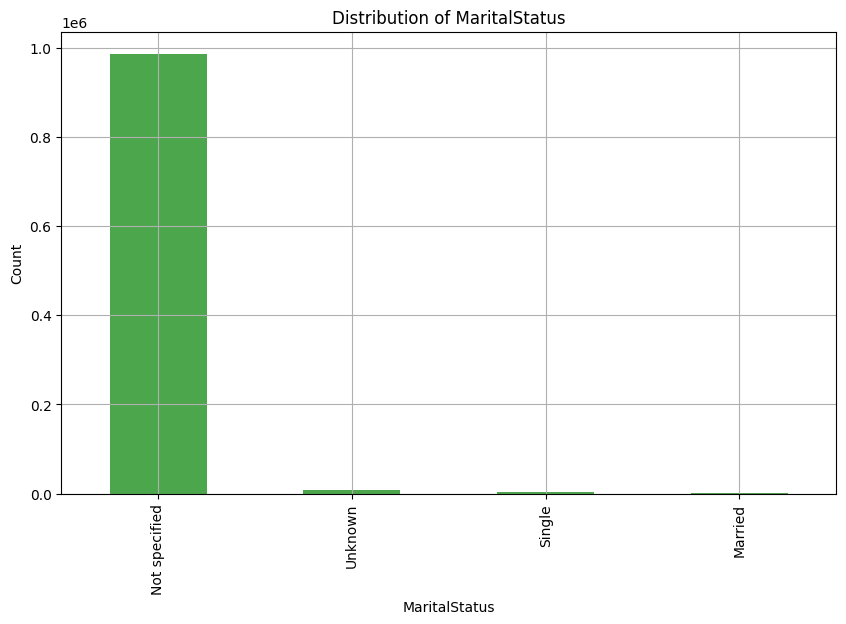

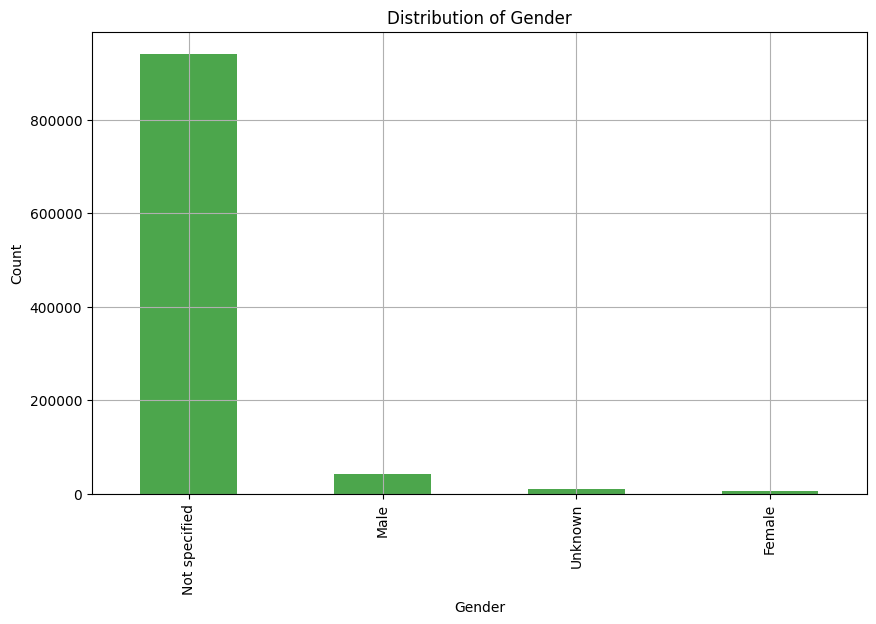

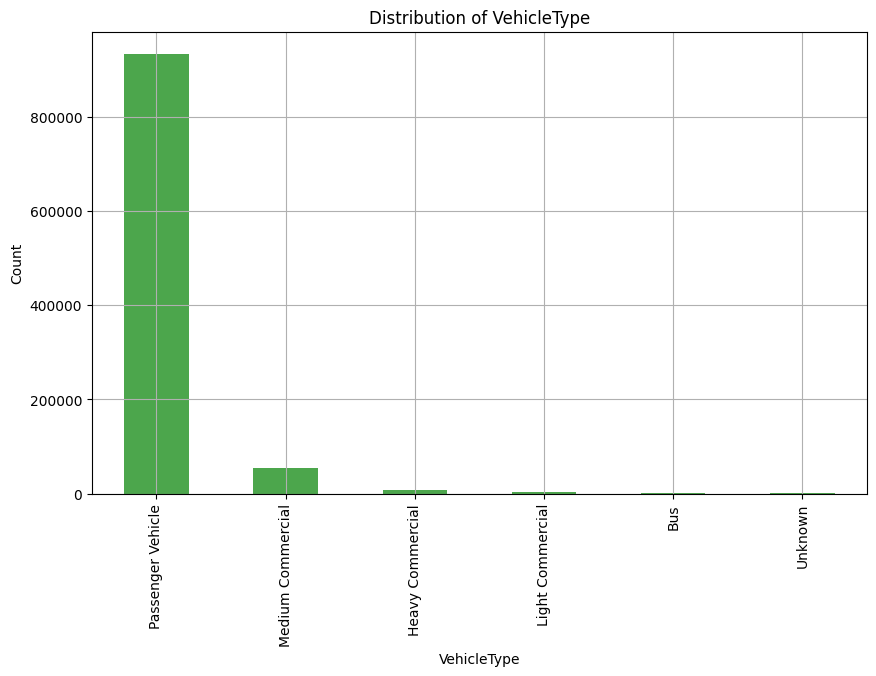

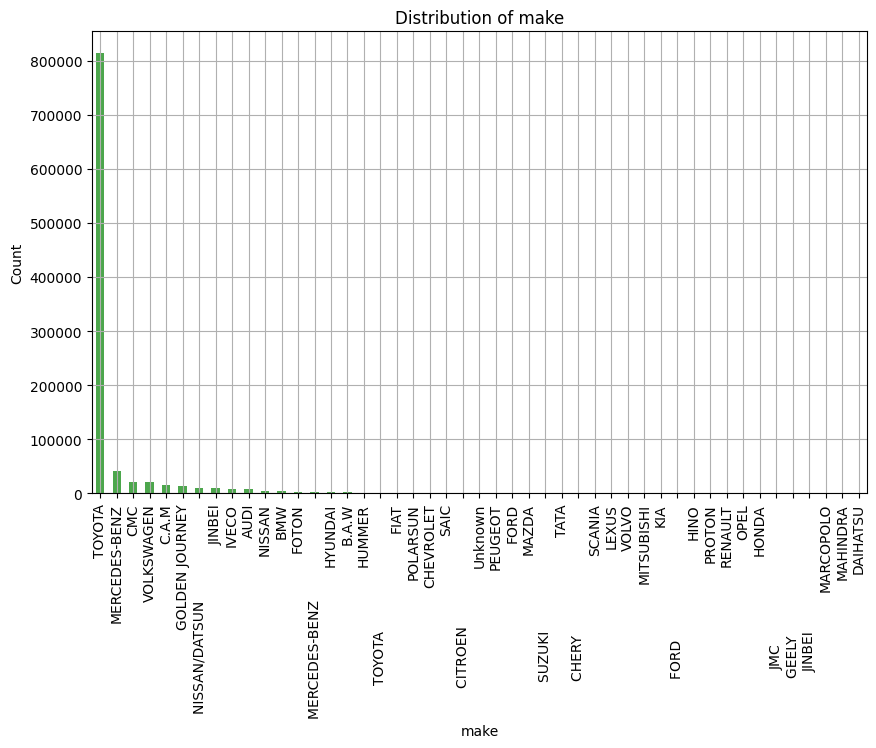

In [46]:
from plot_categorical_column import plot_categorical_bars

categorical_columns = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make']

plot_categorical_bars(cleaned_data, categorical_columns)

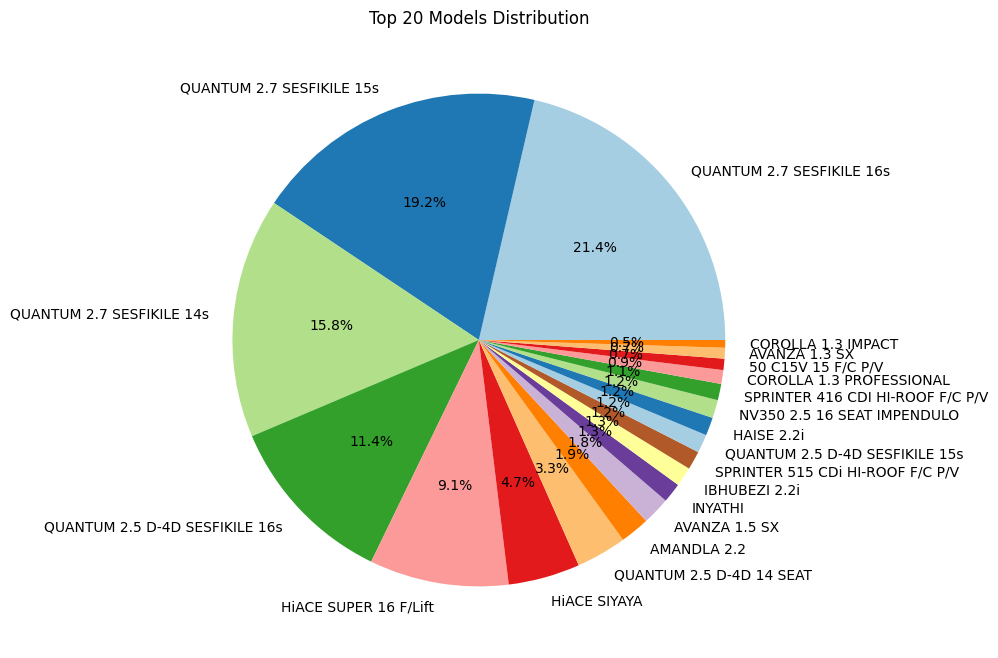

In [47]:
import matplotlib.pyplot as plt
# Top 10 models
top_10_models = cleaned_data['Model'].value_counts().nlargest(20)

# Plot pie chart
plt.figure(figsize=(8, 8))
top_10_models.plot.pie(autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title('Top 20 Models Distribution')
plt.ylabel('')
plt.show()


Available columns in the data: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


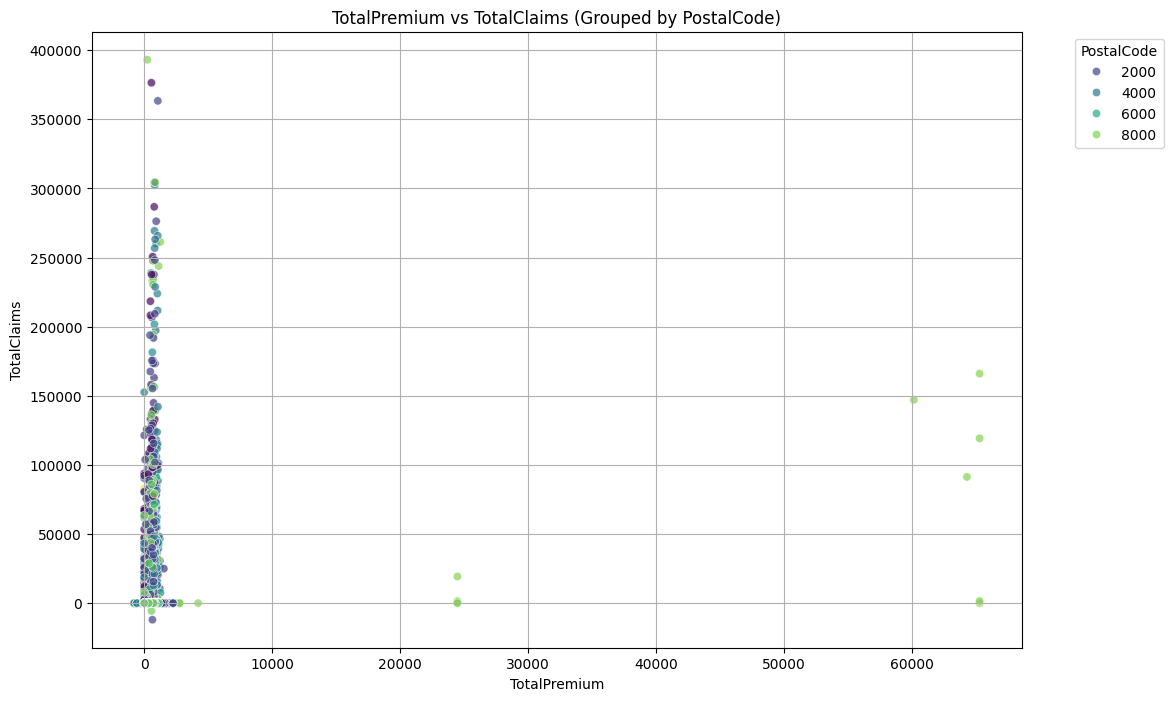

In [48]:
from plot_scatter import plot_scatter

plot_scatter(cleaned_data)

## Correlation

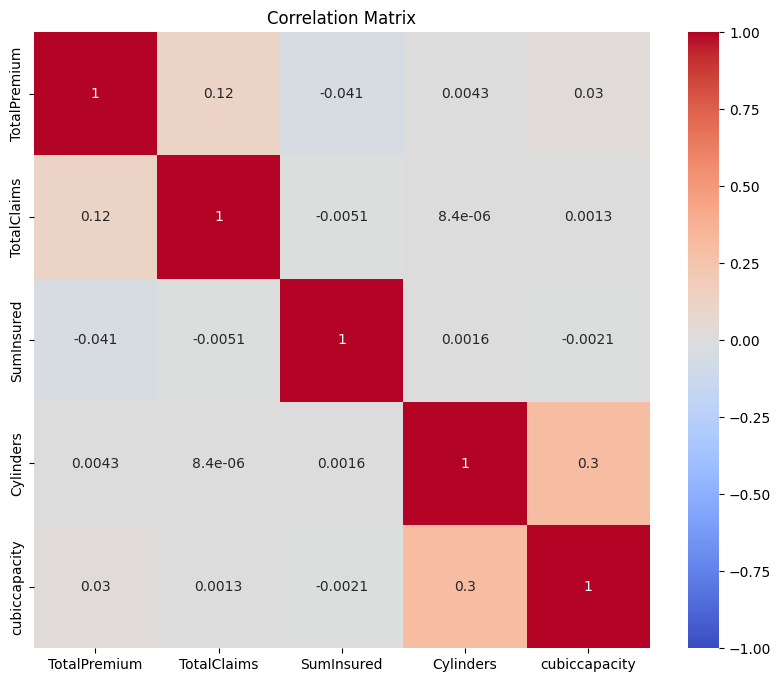

In [49]:
from plot_correlation import plot_correlation_matrix

columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'Cylinders', 'cubiccapacity']

plot_correlation_matrix(cleaned_data, columns)

c:\Users\Administrator\Desktop\KAIM\AlphaCare-Insurance-Solutions\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



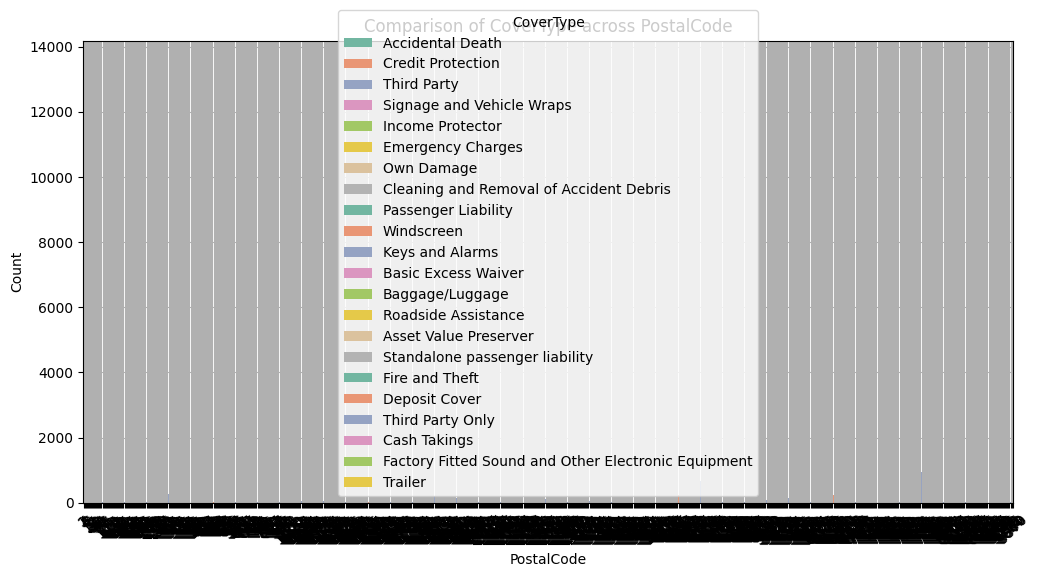

In [89]:
from cover_trend import plot_cover_type_trends

plot_cover_type_trends(cleaned_data, 'PostalCode', 'CoverType')

## Outlier Detection

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2828\4116545930.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2828\4116545930.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2828\4116545930.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_2828\4116545930.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and se

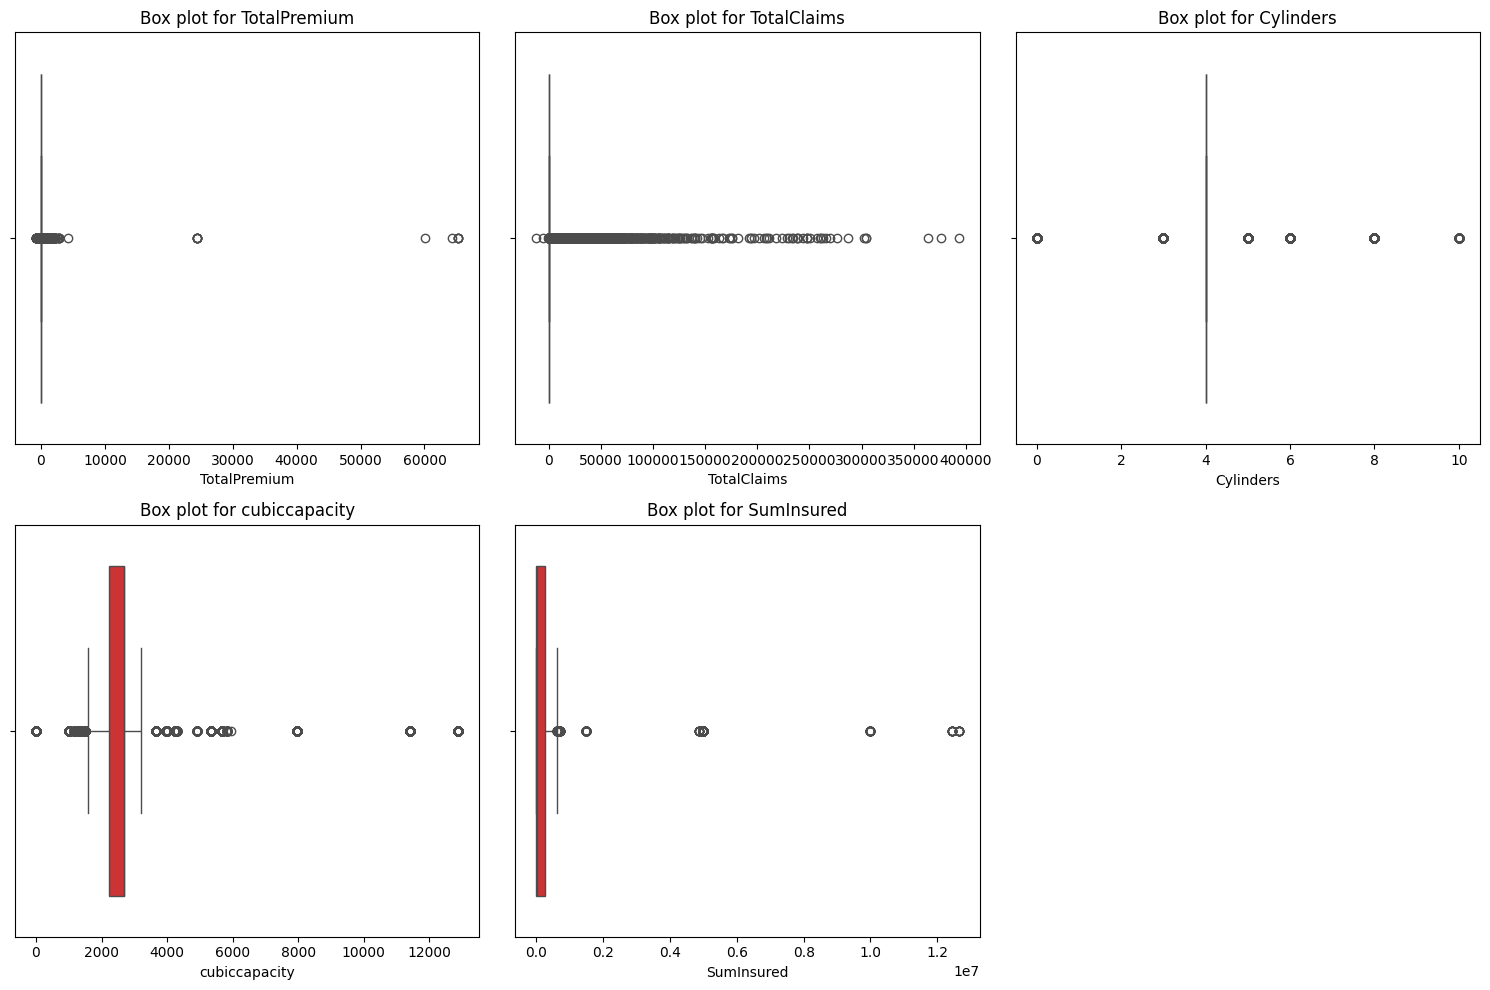

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_outliers(df, numerical_columns):
    """
    Plots box plots to detect outliers in the given numerical columns.

    Parameters:
    - df: DataFrame containing the data
    - numerical_columns: List of numerical columns to plot
    """
    # Set up the figure size and layout
    plt.figure(figsize=(15, 10))

    # Iterate over each numerical column and create a box plot
    for i, column in enumerate(numerical_columns):
        plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns for subplots
        sns.boxplot(x=df[column], palette='Set1')
        plt.title(f'Box plot for {column}')
        plt.xlabel(column)

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()

# Example usage:
numerical_columns = ['TotalPremium', 'TotalClaims', 'Cylinders', 'cubiccapacity', 'SumInsured']
plot_outliers(cleaned_data, numerical_columns)

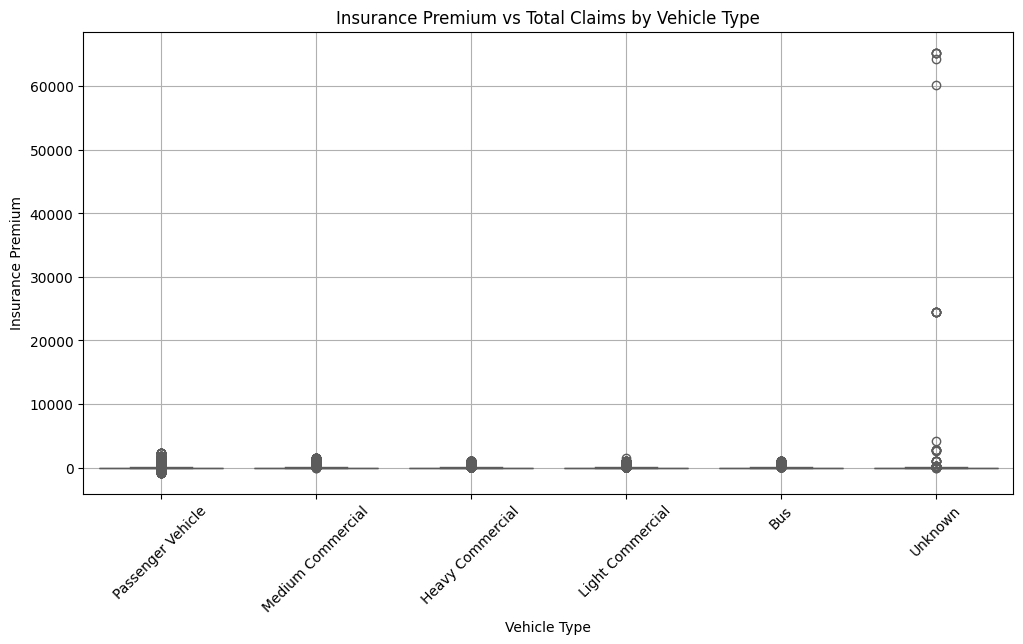

In [99]:
from claim_by_vehicle_type import plot_premium_vs_claims_by_vehicle_type

plot_premium_vs_claims_by_vehicle_type(cleaned_data)


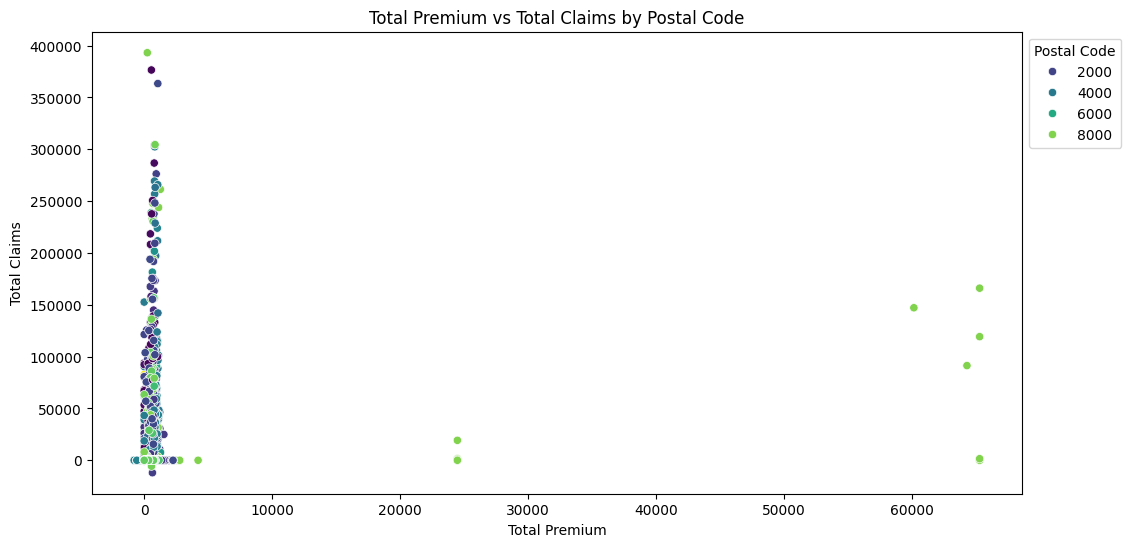

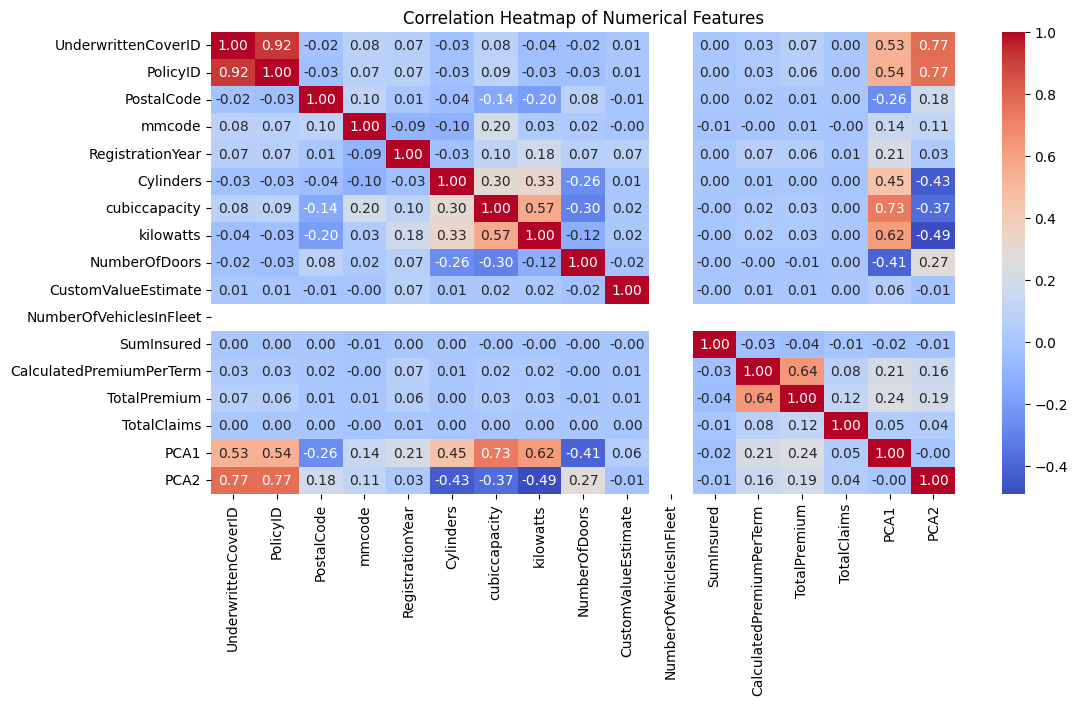

In [102]:
# Scatter plot for TotalPremium vs TotalClaims by PostalCode
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=cleaned_data, palette='viridis')
plt.title('Total Premium vs Total Claims by Postal Code')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Postal Code', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# Select only numeric columns for correlation analysis
numerical_data = cleaned_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numerical columns
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()